In [1]:
import numpy as np
import psrchive as psr
import matplotlib.pyplot as plt
import os
import astropy.stats as ast
from astropy.utils import NumpyRNGContext
import scipy.stats as scs
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [2]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_UWL_01Aug_22/Processed/phase_shifted/timfiles')

In [3]:
df_32p_Entire = pd.read_csv('PostRes_32pulint_Entire_SelChn_all.txt', delim_whitespace=True)
data_32p_Entire=df_32p_Entire.to_numpy()
data_32p_Entire=data_32p_Entire.reshape((-1,35,4))
residuals_32p_Entire=data_32p_Entire[:,:,2]

In [4]:
#### Running bootstrap on residuals_32p_Entire to generate samples
with NumpyRNGContext(1):   
    bootresult_32p_Entire = ast.bootstrap(residuals_32p_Entire, 500)

In [5]:
################### Spearman Correlation coefficient ##########
Chn_Freq_32p_Entire=data_32p_Entire[:,:,1]
Chn_Freq_32p_Entire=np.mean(Chn_Freq_32p_Entire,axis=0)
R_32p_Entire_spr=np.ndarray([bootresult_32p_Entire.shape[0],bootresult_32p_Entire.shape[2],bootresult_32p_Entire.shape[2]])
R_32p_Entire_spr_pval=np.ndarray([bootresult_32p_Entire.shape[0],bootresult_32p_Entire.shape[2],bootresult_32p_Entire.shape[2]])

for i in range(bootresult_32p_Entire.shape[0]):
    R_32p_Entire_spr[i,:,:]=scs.spearmanr(bootresult_32p_Entire[i,:,:],axis=0)[0]
    R_32p_Entire_spr_pval[i,:,:]=scs.spearmanr(bootresult_32p_Entire[i,:,:],axis=0)[1]

<IPython.core.display.Javascript object>


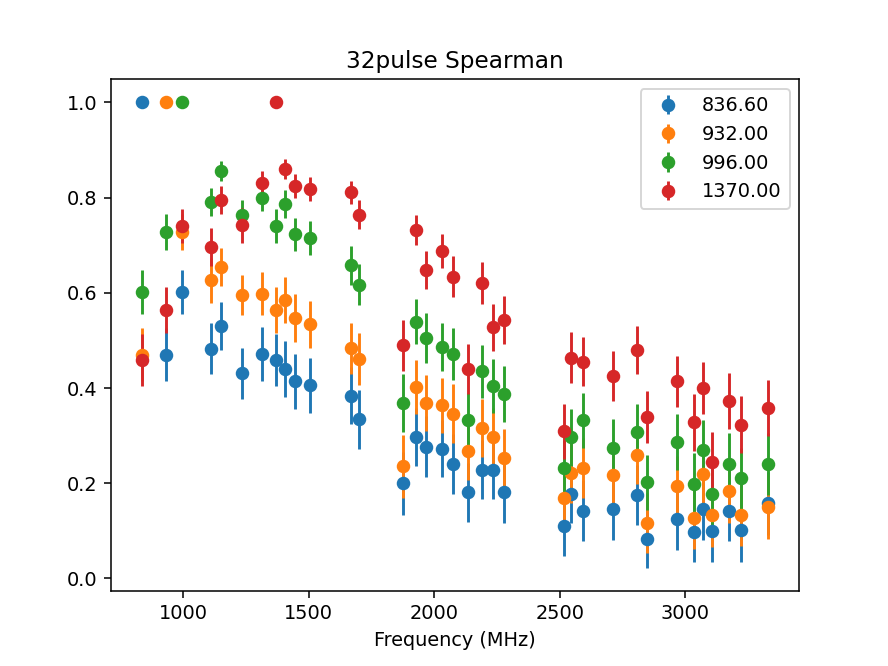

In [6]:
plt.figure()
for i in [0,1,2,7]:
    plt.errorbar(Chn_Freq_32p_Entire,np.mean(R_32p_Entire_spr[:,i,:],axis=0),yerr=1.96*(np.std(R_32p_Entire_spr[:,i,:],axis=0)),fmt='o',label=r'%.2f'%Chn_Freq_32p_Entire[i])

plt.legend()
plt.title("32pulse Spearman")
plt.xlabel("Frequency (MHz)")
plt.show()

In [7]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_UWL_01Aug_22/Processed/phase_shifted/timfiles')

In [8]:
df_32p_Individual = pd.read_csv('PostRes_32pulint_Individual_SelChn_all.txt', delim_whitespace=True)
data_32p_Individual=df_32p_Individual.to_numpy()
data_32p_Individual=data_32p_Individual.reshape((-1,35,4))
residuals_32p_Individual=data_32p_Individual[:,:,2]

In [9]:
#### Running bootstrap on residuals_32p_Individual to generate samples
with NumpyRNGContext(1):   
    bootresult_32p_Individual = ast.bootstrap(residuals_32p_Individual, 500)

In [10]:
################### Spearman Correlation coefficient ##########
Chn_Freq_32p_Individual=data_32p_Individual[:,:,1]
Chn_Freq_32p_Individual=np.mean(Chn_Freq_32p_Individual,axis=0)
R_32p_Individual_spr=np.ndarray([bootresult_32p_Individual.shape[0],bootresult_32p_Individual.shape[2],bootresult_32p_Individual.shape[2]])
R_32p_Individual_spr_pval=np.ndarray([bootresult_32p_Individual.shape[0],bootresult_32p_Individual.shape[2],bootresult_32p_Individual.shape[2]])

for i in range(bootresult_32p_Individual.shape[0]):
    R_32p_Individual_spr[i,:,:]=scs.spearmanr(bootresult_32p_Individual[i,:,:],axis=0)[0]
    R_32p_Individual_spr_pval[i,:,:]=scs.spearmanr(bootresult_32p_Individual[i,:,:],axis=0)[1]

<IPython.core.display.Javascript object>


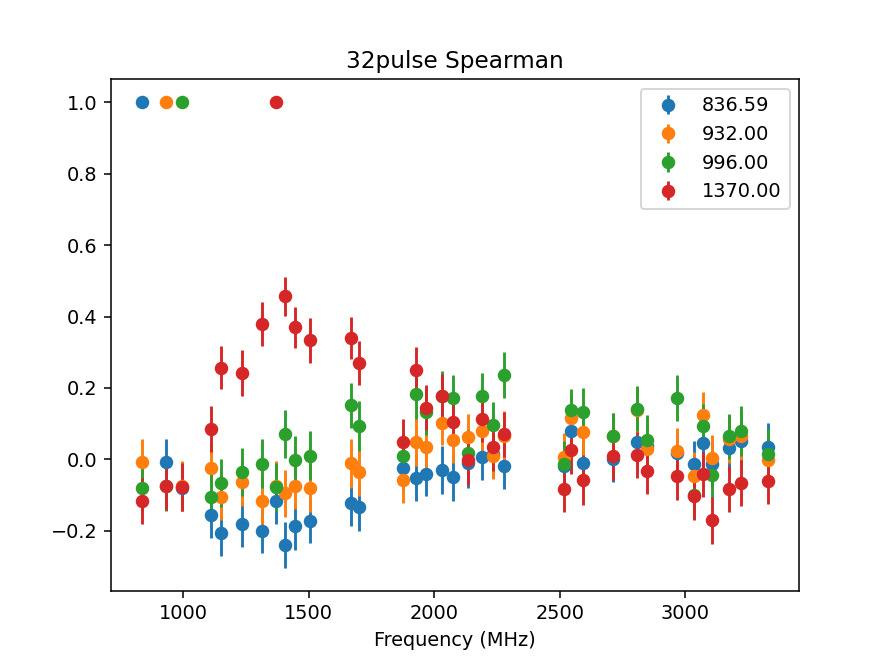

In [11]:
plt.figure()
for i in [0,1,2,7]:
    plt.errorbar(Chn_Freq_32p_Individual,np.mean(R_32p_Individual_spr[:,i,:],axis=0),yerr=1.96*(np.std(R_32p_Individual_spr[:,i,:],axis=0)),fmt='o',label=r'%.2f'%Chn_Freq_32p_Individual[i])

plt.legend()
plt.title("32pulse Spearman")
plt.xlabel("Frequency (MHz)")
plt.show()

<IPython.core.display.Javascript object>


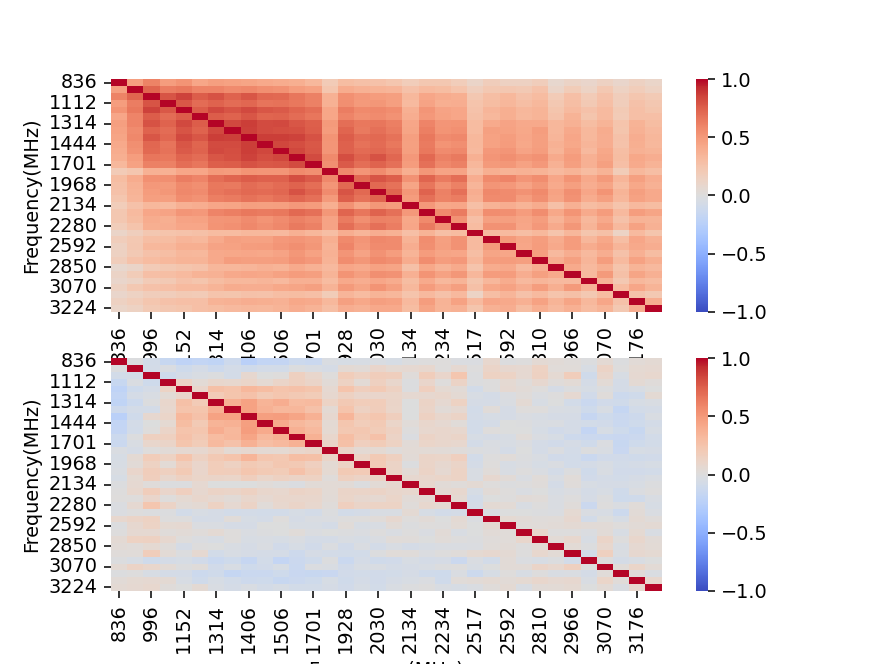

Text(50.722222222222214, 0.5, 'Frequency(MHz)')

In [18]:
a=0
b=34
df_Corr_Entire=pd.DataFrame(np.mean(R_32p_Entire_spr[:,a:b,a:b],axis=0),index=(Chn_Freq_32p_Entire[a:b].astype(int)).astype(str),columns=(Chn_Freq_32p_Entire[a:b].astype(int)).astype(str))
df_Corr_Individual=pd.DataFrame(np.mean(R_32p_Individual_spr[:,a:b,a:b],axis=0),index=(Chn_Freq_32p_Individual[a:b].astype(int)).astype(str),columns=(Chn_Freq_32p_Individual[a:b].astype(int)).astype(str))

Fig, Axs = plt.subplots(2,1)
g1=sns.heatmap(df_Corr_Entire,vmin=-1,vmax=1,ax=Axs[0],cmap='coolwarm')
Axs[0].set_xlabel("Frequency(MHz)")
Axs[0].set
Axs[0].set_ylabel("Frequency(MHz)")
g2=sns.heatmap(df_Corr_Individual,vmin=-1,vmax=1,ax=Axs[1],cmap='coolwarm')

Axs[1].set_xlabel("Frequency(MHz)")
Axs[1].set_ylabel("Frequency(MHz)")
#plt.show()

In [13]:
print(Chn_Freq_32p_Entire)

[ 836.59947664  932.00010208  996.         1112.         1152.
 1236.         1314.         1370.         1406.         1444.
 1506.         1668.         1701.99994664 1876.00010208 1928.
 1968.4        2030.         2075.777778   2134.         2190.46757278
 2234.8        2280.         2517.99990975 2545.55910227 2592.
 2712.         2810.         2850.         2966.         3034.
 3070.         3108.         3176.         3224.         3330.        ]
